In [1]:
import re
import tweepy
import pandas as pd
from textblob import TextBlob
# nlpk library for phather 

consumer_key = 'GzzTvTE4TO27FfkVX1YICJhz0'
consumer_secret = '5nxjEGLEn0tSNPN2pCKdOsJVkxfm2LV9Go2JLATo3354rEh0p7'
access_token = '1467812169110667264-5UWAm0TbEgS9lRpiZvJwLqaO1dvsKi'
access_token_secret = 'UWcqWXHOpIe7sX6IPFvrTBX2oJY0uIsMe4BcHL652gOup'
# bearer_token = 'AAAAAAAAAAAAAAAAAAAAAOxSewEAAAAAr43BgJErir28EVTLEVEvZbJUWCo%3Dy7rjh9bGrNqkdVMfYsR77IEvEayIrOJqlTsG4IhcOUBWPFkPjd'

auth = tweepy.OAuthHandler(consumer_key,consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth, wait_on_rate_limit=True)
# auth = tweepy.OAuth1UserHandler(
#     consumer_key, consumer_secret, access_token, access_token_secret
# )

In [5]:
number_of_tweets = 20
data = tweepy.Cursor(api.search, q="elonmusk since:2022-03-01",lang="en", tweet_mode='extended').items(number_of_tweets)

tweets = []
for i in data:
    tweets.append(i)
print("Total Tweets fetched:", len(tweets))

Total Tweets fetched: 20


In [6]:
def clean_tweet(tweet):
    ''' Utility function to clean tweet text by removing links, special characters using simple regex statements. '''
    return ' '.join(re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)", " ", tweet).split())

In [7]:
def get_tweet_sentiment(tweet):
    ''' Utility function to classify sentiment of passed tweet using textblob's sentiment method '''
    # create TextBlob object of passed tweet text
    analysis = TextBlob(clean_tweet(tweet))
    # set sentiment
    if analysis.sentiment.polarity > 0:
        return 'positive'
    elif analysis.sentiment.polarity == 0:
        return 'neutral'
    else:
        return 'negative'

In [8]:
user = []
user_loc = []
user_ver = []
time = []
tweet_text = []
hash = []
source = []
likes = []
sentiment = []

for tweet in tweets:
    hashtags = []
    try:
        for hashtag in tweet.entities["hashtags"]:
            hashtags.append(hashtag["text"])
        text = api.get_status(id=tweet.id, tweet_mode='extended').full_text
        text = clean_tweet(text)
    except:
        pass
    user.append(tweet.user.name)
    user_loc.append(tweet.user.location)
    user_ver.append(tweet.user.verified)
    time.append(tweet.created_at)
    tweet_text.append(text)
    hash.append(hashtags if hashtags else None)
    source.append(tweet.source)
    likes.append(tweet.favorite_count)
    sentiment.append(get_tweet_sentiment(text))
    check = tweet
    
tweet_text

['RT You have the ability right now to pardon important figures like Dr Malone and Dr McCullough and give them',
 'RT doge If I committed suicide it is not real Elon Musk just now on Twitter Spaces Protect at all costs he is free',
 'RT The Biden administration is setting up',
 'You need to catch up Mr Beschloss Trump is no longer president has opened the door to the real sedition the real insurrection Please join us',
 'What a loser you are Elon With all that speculation money on your hands and still can t educate yourself',
 'Absolutely want to see hidden Covid files about the biggest fear campaign in human history',
 'No more section 230 I see',
 'RT karthik These emoji s aren t enough to describe the mental madness of TheeThalapathy I request to add more fi',
 'RT amp Prince Al Waleed see thread',
 'RT yes they both uncovered crimes being committed by our own govt',
 'RT sacrificed his future to reveal surveillance abuses by the U S gov Courts affirmed the NSA FBI pract',
 'RT Of c

In [9]:
df = pd.DataFrame({'User name':user, 'User Location':user_loc, 'User Verified':user_ver, 'Time':time, 
    'Tweets':tweet_text, 'Sentiment':sentiment, 'Hashtag':hash, 'Likes':likes, 'source':source })
# df[df['Tweets'].str.contains('RT')]
df

,User name,User Location,User Verified,Time,Tweets,Sentiment,Hashtag,Likes,source
0,italyungirl22lr,,False,2022-12-04 12:11:55,RT You have the ability right now to pardon im...,positive,None,0,Twitter Web App
1,VENIVIDIVICI_YSH71,,False,2022-12-04 12:11:54,RT doge If I committed suicide it is not real ...,positive,None,0,Twitter for Android
2,FatKat1776,,False,2022-12-04 12:11:54,RT The Biden administration is setting up,neutral,None,0,Twitter Web App
3,KC Frew,"Knoxville, TN",False,2022-12-04 12:11:54,You need to catch up Mr Beschloss Trump is no ...,positive,None,0,Twitter Web App
4,João Sgarbi,,False,2022-12-04 12:11:54,What a loser you are Elon With all that specul...,neutral,None,0,Twitter Web App
5,Ruth Rendely,,False,2022-12-04 12:11:54,Absolutely want to see hidden Covid files abou...,positive,None,0,Twitter Web App
6,Keith Conlisk,,False,2022-12-04 12:11:54,No more section 230 I see,negative,None,0,Twitter Web App
7,malicious_user,,False,2022-12-04 12:11:54,RT karthik These emoji s aren t enough to desc...,positive,[TheeThalapathy],0,Twitter for iPhone
8,Fed Up!,,False,2022-12-04 12:11:54,RT amp Prince Al Waleed see thread,neutral,None,0,Twitter for iPhone
9,Lela2,America,False,2022-12-04 12:11:53,RT yes they both uncovered crimes being commit...,positive,None,0,Twitter Web App


In [10]:
total_pos = 0
total_neg = 0
total_neu = 0
total_tweets = len(sentiment)
for i in range (len(sentiment)):
      if (sentiment[i] == "positive") : total_pos += 1
      elif (sentiment[i] == "negative") : total_neg += 1
      else : total_neu += 1
      

print("Total Positive Tweets % : {:.2f}"
      .format((total_pos/total_tweets)*100))
print("Total Negative Tweets % : {:.2f}"
      .format((total_neg/total_tweets)*100))
print("Total Neutral Tweets % : {:.2f}"
      .format((total_neu/total_tweets)*100))

Total Positive Tweets % : 60.00
Total Negative Tweets % : 15.00
Total Neutral Tweets % : 25.00


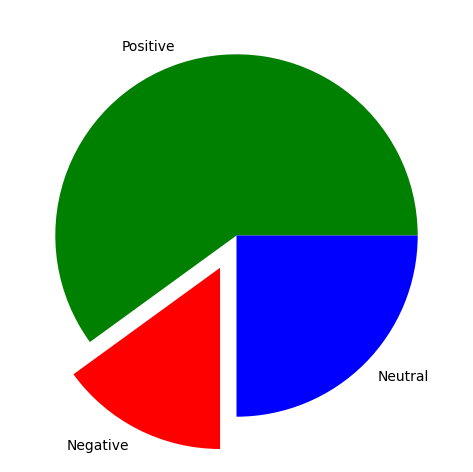

In [16]:
import matplotlib.pyplot as plt
mylabels = ["Positive", "Negative", "Neutral"]
mycolors = ["Green", "Red", "Blue"]
 
plt.figure(figsize=(18, 6),
           dpi=100)  # Push new figure on stack
myexplode = [0, 0.2, 0]
plt.pie([total_pos, total_neg, total_neu], colors=mycolors,
        labels=mylabels, explode=myexplode)
plt.show()

In [ ]:
df.to_csv('file1.csv')